<h1>Lab 1: Basic Digital Signal Processing</h1>

# Initialization



In [57]:
import numpy as np
import scipy as sp
from scipy import signal
from scipy.io import wavfile
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Audio, display
from scipy.fft import fft, fftfreq

# Exercise 1

The proposed filter has transfer function $H(z) = 1-2cos(\theta) z^{-1} + z^{-2}$. To determine the recursion formula (difference equation) for this filter we can derive it from the system with a rational system function 

$$Y(z) = X(z)H(z), \;\;\; \text{where} \; H(z)=\frac{P(z)}{Q(z)}=\frac{\sum_{k=0}^M b_k z^{-k}}{\sum_{k=0}^N a_k z^{-k}}$$

We thus consider in our case a system with a transfer function with 2 zeros and no poles (except at $0$ and $\infty$) in our case.

$$Y(z) = X(z)\frac{\sum_{k=0}^M b_k z^{-k}}{\sum_{k=0}^N a_k z^{-k}}$$

$$\left(\sum_{k=0}^N a_k z^{-k}\right)Y(z) = X(z)\left(\sum_{k=0}^M b_k z^{-k}\right)$$

Since the multiplication by $z^-1$ corresponds to a shift of the sequence we have

$$a[0]y[n] = b[0]x[n] + b[1]x[n-1] + \ldots + b[M]x[n-M] - a[1]y[n-1] - \ldots - a[N]y[n-M]$$

Substituting the expression of the considered filter in the system equation we obtain 

$$Y(z) = X(z)(1-2cos(\theta) z^{-1} + z^{-2})$$

$$y[n] = x[n] -2cos(\theta)x[n-1] + x[n-2]$$

$$a[0]y[n] = b[0]x[n] + b[1]x[n-1] b[2]x[n-2]$$

From which we can see $a[0]=1, \; a[1]=0, \; a[2]=0, \; b[0]=1, \; b[1]=-2cos(\theta), \; b[2]=1$

In [58]:
# This is an example of how a FIR filter can be implemented in python
theta = np.pi/6

# Define the filter coefficients
b = [1, -2*np.cos(theta), 1] 
a = [1, 0, 0]  

# Filter the signal (we will do this later, after importing all the data)
# y = signal.lfilter(b, a, x)

To study the filter's frequency response $|H(e^{i\omega})|$ in the interval $-\pi < \omega < \pi$ we can do the following

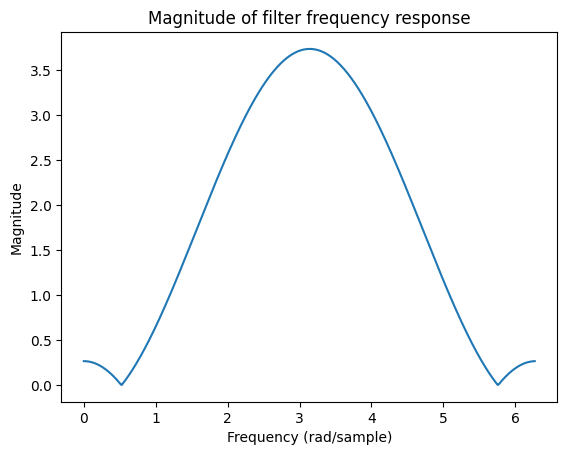

In [59]:
# Compute frequency response of filter
w, h = signal.freqz(b, a, worN=512, whole=True)

# Plot magnitude of frequency response
plt.plot(w, np.abs(h))
plt.xlabel('Frequency (rad/sample)')
plt.ylabel('Magnitude')
plt.title('Magnitude of filter frequency response')
plt.show()

The freqz function does not allow to change the frequency interval directly. So another way to compute the magnitude of the filter frequency response would be to compute the absolute value of the transform of the impulse function over different frequencies

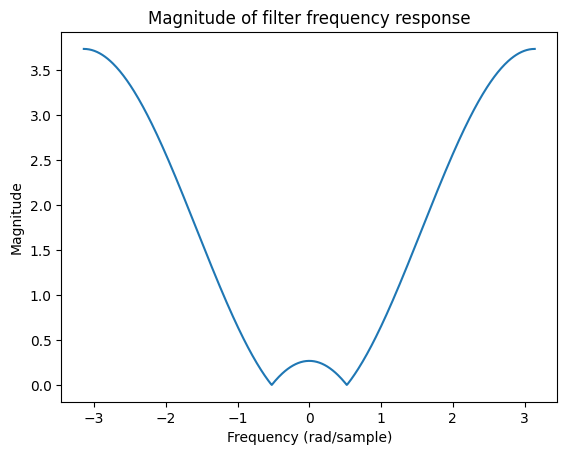

In [60]:
# Define frequency range
w = np.linspace(-np.pi, np.pi, num=512)

# Compute frequency response
H = np.abs(1 - 2*np.cos(np.pi/6)*np.exp(-1j*w) + np.exp(-2j*w))

# Plot frequency response
plt.plot(w, H)
plt.xlabel('Frequency (rad/sample)')
plt.ylabel('Magnitude')
plt.title('Magnitude of filter frequency response')
plt.show()

Notice that the response is over the normalized frequencies. After importing the data, we will have to include the samplerate when calling the functions.

## Import the data

This is the original file audio. **CAREFUL, AUTOPLAY IS ON**

In [61]:
Audio('/content/drive/MyDrive/10 - UB /30 - 2nd semester courses/10 - Applied Harmonic Analysis/Labs/Lab2/easy.wav', autoplay=True)

Reading the .wav file we can recover the discrete time signal sequence as well as the samplerate

In [62]:
samplerate, x_original = wavfile.read('/content/drive/MyDrive/10 - UB /30 - 2nd semester courses/10 - Applied Harmonic Analysis/Labs/Lab2/easy.wav')

n_samples = len(x_original)

print("x:", x_original[:5])
print("number of samples in x:", n_samples)
print("sample rate:", samplerate)

x: [0 0 0 0 0]
number of samples in x: 198450
sample rate: 44100


Normalizing the signal to have magnitude in the range of [0,1] is a common practice to work with it better. In particular, Octave and Matlab do so automatically and seeminglessly, and the provided noise function in the exercise works as intended with a normalized signal. For this reason in the following cell we do so

In [63]:
x_original = (x_original.astype(np.float) - x_original.min()) / (x_original.max().astype(np.float) - x_original.min())

<ipython-input-63-ae3918d2f834>:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x_original = (x_original.astype(np.float) - x_original.min()) / (x_original.max().astype(np.float) - x_original.min())


<Figure size 640x480 with 0 Axes>

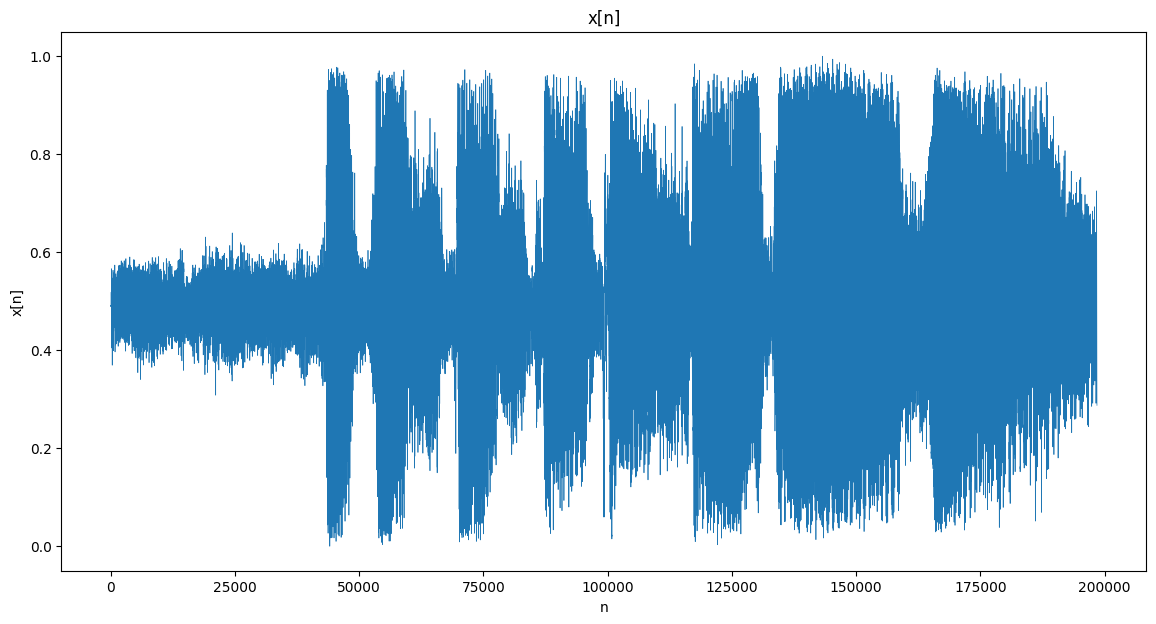

In [64]:
nn = np.linspace(0, n_samples-1, n_samples).astype(int)

plt.figure()
plt.figure(figsize=(14,7))
plt.title("x[n]")
plt.xlabel("n")
plt.ylabel("x[n]")
plt.plot(nn, x_original, linewidth=0.5)

## Add the noise to the signal

Now we can add the noise to the original file audio

In [65]:
t = np.arange(n_samples+1)[1:]/samplerate;
x = 0.8*x_original + 0.1*np.sin(35000*t)

n_samples = len(x)

print("x:", x[:5])
print("number of samples in x:", n_samples)
print("sample rate:", samplerate)

x: [0.46327899 0.49197355 0.46092571 0.38868672 0.31841977]
number of samples in x: 198450
sample rate: 44100


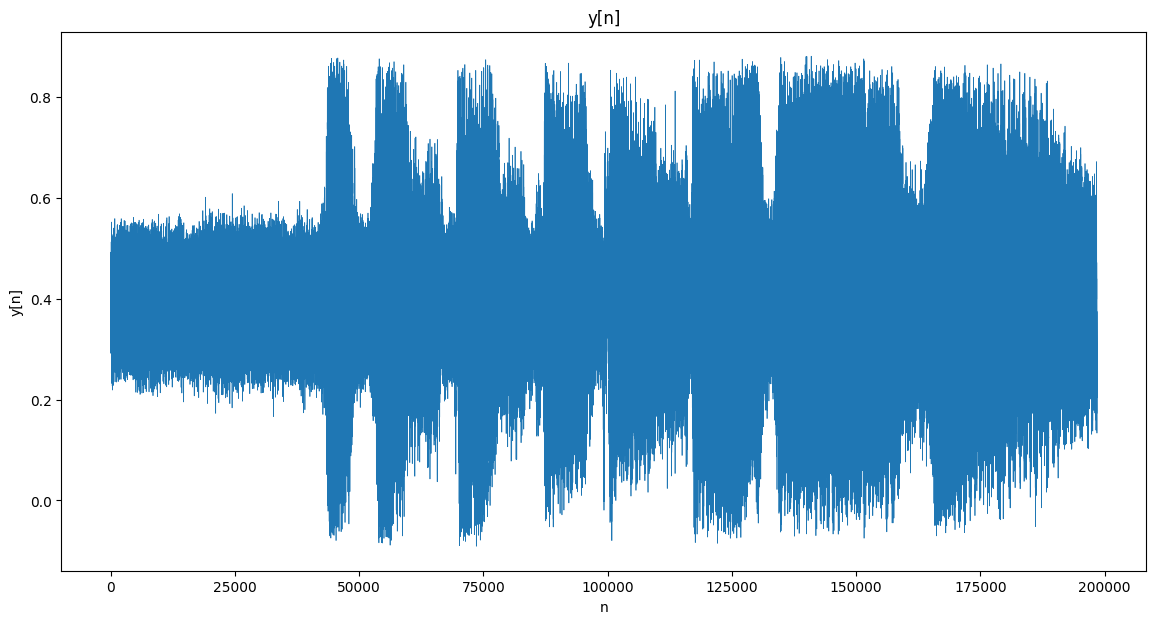

In [66]:
nn = np.linspace(0, n_samples-1, n_samples).astype(int)

plt.figure(figsize=(14,7))
plt.title("y[n]")
plt.xlabel("n")
plt.ylabel("y[n]")
plt.plot(nn, x, linewidth=0.5)

This is the signal with the added noise. **CAREFUL, AUTOPLAY IS ON**

In [67]:
# This normalizes the signal before writing the file, but it still doesn't work correctly
m = np.max(np.abs(x))
xf32 = (x/m).astype(np.float32)
sp.io.wavfile.write('/content/drive/MyDrive/10 - UB /30 - 2nd semester courses/10 - Applied Harmonic Analysis/Labs/Lab2/noisy.wav', samplerate, xf32)

# wavfile.write('/content/drive/MyDrive/10 - UB /30 - 2nd semester courses/10 - Applied Harmonic Analysis/Labs/Lab2/noisy.wav', samplerate, y)

Audio('/content/drive/MyDrive/10 - UB /30 - 2nd semester courses/10 - Applied Harmonic Analysis/Labs/Lab2/noisy.wav', autoplay=True)

## Frequency analysis

Here it follows a **spectrogram** frequency representation. I'm taking the oportunity of these labs to explore the python libraries dedcated to signal analysis and thus experimenting a bit. </br> 
I apologize if sometimes I stray from the canonic requirements of the exercise or if I take different paths in the analysis due to the differences between Python and Octave/Matlab. Also, I apologize if the frequency analysis will be missing some charts or it will present different charts. I am trying my best to implement everything in Python, but I'm finding the dedicated libraries to not work as seeminglessly as Octave/Matlab, so I was not able to obtain all the outputs I wish I managed to get from them. (But I will find a way)

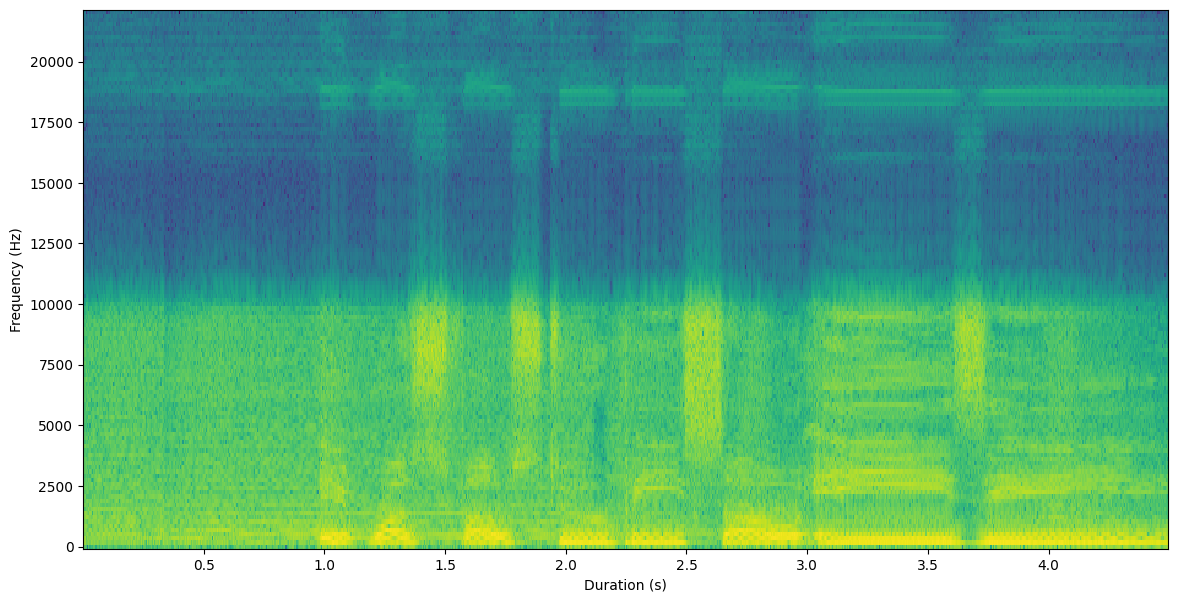

In [68]:
freqs, time, spec = signal.spectrogram(x_original, fs=samplerate)

plt.figure(figsize=(14,7))
plt.pcolormesh(time, freqs, np.log(spec))
plt.xlabel('Duration (s)')
plt.ylabel('Frequency (Hz)')
plt.show()

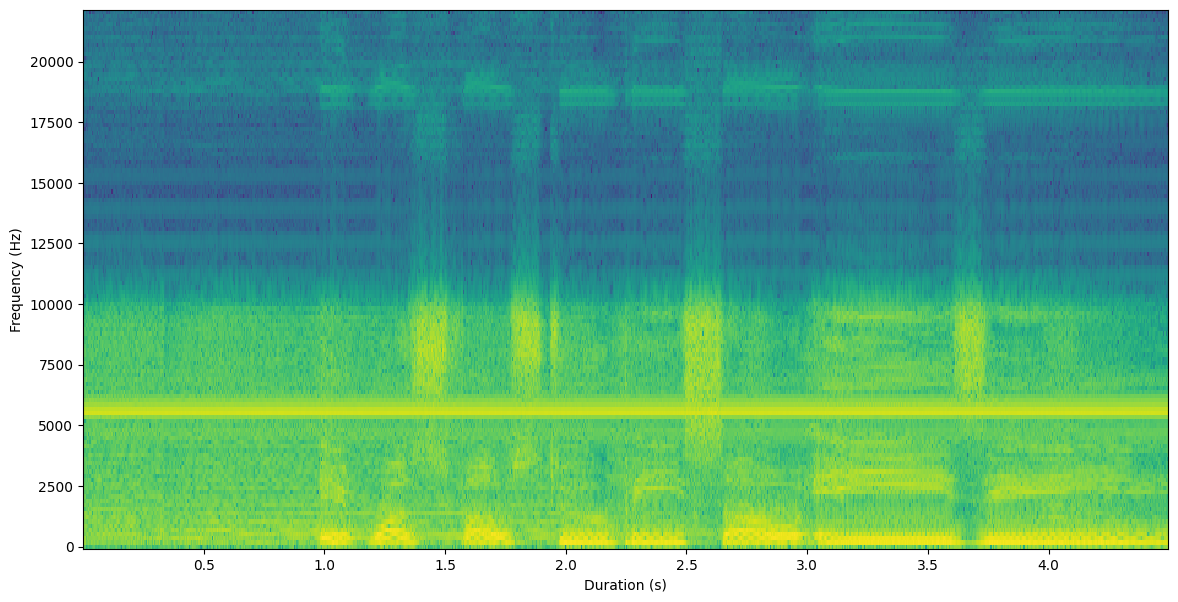

In [69]:
freqs, time, spec = signal.spectrogram(x, fs=samplerate)

plt.figure(figsize=(14,7))
plt.pcolormesh(time, freqs, np.log(spec))
plt.xlabel('Duration (s)')
plt.ylabel('Frequency (Hz)')
plt.show()

In this case from the spectrogram it is very simple to identify a noise with a constant frequency such the one we have added. This is a useful way to visualize the different frequencies during the duration of the signal.

## Filtering out the noise

To remove the noise we need to design the proposed filter to have a zero at the frequency of the noise. In this case we know exactly what the frequency of the noise is, since we have added it artificially, and we thus can choose $\theta$ to be exactly the same as the frequency of the sine wave we added. This is because the filter is designed to have a zero at $e^{i\theta}$ and so it will not pass pure sine waves at frequency $\omega=\theta$. </br> 
Notice that in this case when we added the noise with the sine wave we used a frequency of $sin(35000t)$. However, the way the signal is computed is 

$$y = 0.8*x + 0.1sin(35000t), \;\;\; \text{with} \; t = (1:\text{length}(x))/samplerate;$$

Therefore, when we add the sine term to the signal $x$, whose length is not normalized with respect to time, we obtain a term with frequency of $35000/samplerate$. We will thus set $\theta = 35000/samplerate$

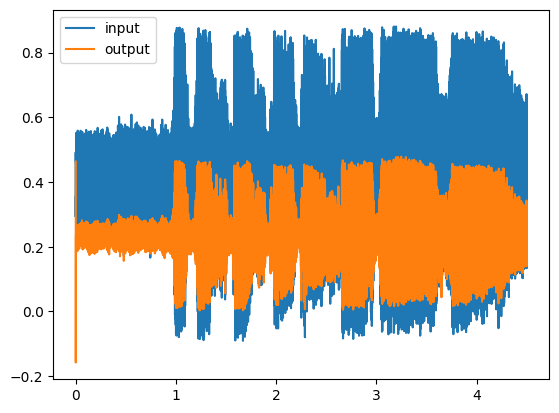

In [70]:
theta = 35000/samplerate

# Define filter coefficients
b = [1, -2*np.cos(theta), 1]  # feedforward (numerator) coefficients
a = [1, 0, 0]  # feedback (denominator) coefficients

# Filter the signal
y = signal.lfilter(b, a, x)

# Plot the input and output signals
plt.plot(t, x, label='input')
plt.plot(t, y, label='output')
plt.legend()
plt.show()

Notice that unfortunately the python function to apply a FIR filter that can be found in the scypy signal library does not give the option to add a non-zero padding. A solution to this could be to simply apply the convolution manually after adding a different padding (like we did in Lab1), but in this case I tried to stick to the dedicated library in order to solve this. (I chose to do so in order to have the opportunity to learn and explore them and their applications also for future possible uses) 

We can thus compute the magnitude of the filter's frequency response. (I've been having issue centering the interval in $0$ with the freqz function implemented in sthe cipy.signal library, $[0,2\pi]$ is the interval for which it computes the signal repsonse. So I computed the magnitude of the filter's frequency response directly from the absolute value of the transform of the filter)

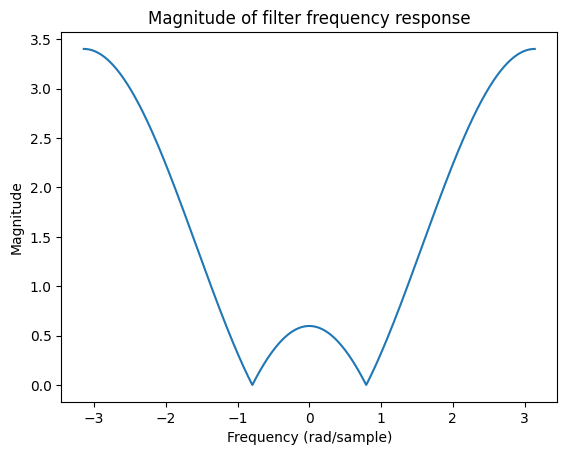

In [71]:
# Define frequency range
w = np.linspace(-np.pi, np.pi, num=512)

# Compute frequency response
H = np.abs(1 - 2*np.cos(theta)*np.exp(-1j*w) + np.exp(-2j*w))

# Plot frequency response
plt.plot(w, H)
plt.xlabel('Frequency (rad/sample)')
plt.ylabel('Magnitude')
plt.title('Magnitude of filter frequency response')
plt.show()

Finally, this is the filtered signal. **CAREFUL, AUTOPLAY IS ON**

In [72]:
# This normalizes the signal before writing the file, but it still doesn't work correctly
m = np.max(np.abs(y))
yf32 = (y/m).astype(np.float32)
sp.io.wavfile.write('/content/drive/MyDrive/10 - UB /30 - 2nd semester courses/10 - Applied Harmonic Analysis/Labs/Lab2/noisy.wav', samplerate, yf32)

# wavfile.write('/content/drive/MyDrive/10 - UB /30 - 2nd semester courses/10 - Applied Harmonic Analysis/Labs/Lab2/noisy.wav', samplerate, y)

Audio('/content/drive/MyDrive/10 - UB /30 - 2nd semester courses/10 - Applied Harmonic Analysis/Labs/Lab2/noisy.wav', autoplay=True)